In [51]:
import matplotlib.pyplot as plt
import numpy as np

def create_decision_plot(models, texture_decisions, shape_decisions, accuracies, search_points=None):
    """
    Create a research visualization showing texture vs shape decision fractions,
    with points positioned based on accuracy on the vertical axis.
    
    Args:
        models (list): Names of models to plot
        texture_decisions (list): Fraction of texture decisions for each model (0-1 scale)
        shape_decisions (list): Fraction of shape decisions for each model (0-1 scale)
        accuracies (list): Accuracy percentages for each model
        search_points (dict): Optional dictionary of search points for each model
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    shape_biased_indices = []
    texture_biased_indices = []
    neutral_indices = []
    
    # Categorize models as texture-biased, shape-biased, or neutral
    for i in range(len(models)):
        if 0.47 <= texture_decisions[i] <= 0.53:  # Neutral range for texture decisions (gray stars)
            neutral_indices.append(i)
        elif texture_decisions[i] > 0.53:  # Texture-biased models (orange)
            texture_biased_indices.append(i)
        elif texture_decisions[i] < 0.47:  # Shape-biased models (blue)
            shape_biased_indices.append(i)

    for accuracy in accuracies:
        ax.hlines(accuracy, 0, 1, colors='gray', linestyles=':', linewidth=0.5)
    
    # Plot all points based on texture decision (<0.47 on texture = blue, >0.53 on texture = orange)
    for i in range(len(models)):
        if texture_decisions[i] > 0.53:
            ax.scatter(texture_decisions[i], accuracies[i], color='#ff7f0e', s=100)  # Orange
        elif texture_decisions[i] < 0.47:
            ax.scatter(texture_decisions[i], accuracies[i], color='#1f77b4', s=100)  # Blue

    # Plot neutral models (stars for texture decision between 0.47 and 0.53)
    if neutral_indices:  
        for i in neutral_indices:
            ax.scatter((texture_decisions[i] + shape_decisions[i]) / 2, accuracies[i], 
                       marker='*', color='gray', s=150, label='Neutral' if i == neutral_indices[0] else "")
    
    if search_points:
        for i, model in enumerate(models):
            if model in search_points:
                points = search_points[model]
                ax.scatter([p[0] for p in points], [accuracies[i]] * len(points), 
                           color='gray', alpha=0.3, s=30)
    
    ax.set_xticks(np.arange(0, 1.1, 0.2))
    ax.set_yticks(accuracies)
    ax.set_yticklabels([f"{a}%" for a in accuracies])
    ax.set_xlim(0, 1)
    ax.set_ylim(min(accuracies) - 5, max(accuracies) + 5)
    ax.set_xlabel('Fraction of "texture" decisions')
    ax.set_ylabel('Accuracy (%)')
    
    ax2 = ax.twiny()
    ax2.set_xlim(1, 0) 
    ax2.set_xlabel('Fraction of "shape" decisions')
    
    for i in range(len(models)):
        if texture_decisions[i] > 0.53:
            ax.text(texture_decisions[i], accuracies[i] + 1, 
                    f"{models[i]} ({shape_decisions[i]:.2f}, {texture_decisions[i]:.2f})", 
                    fontsize=9, ha='left', va='bottom', color='#ff7f0e')  # Label for texture-biased (orange)
        elif texture_decisions[i] < 0.47:
            ax.text(texture_decisions[i], accuracies[i] + 1, 
                    f"{models[i]} ({shape_decisions[i]:.2f}, {texture_decisions[i]:.2f})", 
                    fontsize=9, ha='right', va='bottom', color='#1f77b4')  # Label for shape-biased (blue)

    for i in neutral_indices:
        ax.text((texture_decisions[i] + shape_decisions[i]) / 2, accuracies[i] + 1, 
                f"{models[i]} ({shape_decisions[i]:.2f}, {texture_decisions[i]:.2f})", 
                fontsize=9, ha='center', va='bottom', color='gray')  # Label for neutral models

    
    handles, labels = ax.get_legend_handles_labels()
    legend_labels = ['Texture-biased (Orange)', 'Shape-biased (Blue)', 'Neutral']
    orange_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff7f0e', markersize=10)
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=10)
    handles = [orange_patch, blue_patch] + handles
    labels = legend_labels + labels

    ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=True)
    
    plt.tight_layout()
    return fig


/var/folders/kw/3l9h8n2d7112djkp0tgw4j880000gn/T/ipykernel_30804/2471296067.py:96: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 4
  ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=True)


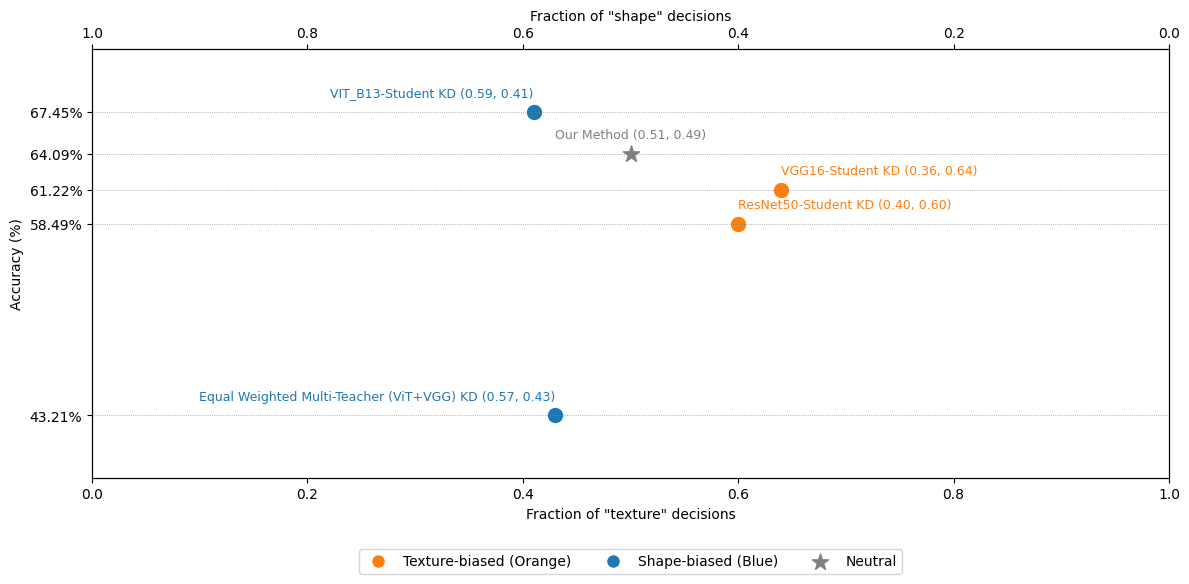

In [53]:
models = ["VGG16-Student KD", "VIT_B13-Student KD", "Equal Weighted Multi-Teacher (ViT+VGG) KD", "Our Method", "ResNet50-Student KD"]
shape_decisions = [0.36, 0.59, 0.57, 0.51, 0.40]  
texture_decisions = [0.64, 0.41, 0.43, 0.49, 0.60]  
accuracies = [61.22, 67.45, 43.21, 64.09, 58.49] 

fig = create_decision_plot(models, texture_decisions, shape_decisions, accuracies)
plt.show()
